# MODELLING:

In [1]:
import pandas as pd

####  Read the required Dataset:

In [2]:
X_train = pd.read_csv("C:/Users/mural/MDS/BLOCK6/586_LOGWORK/loglizer/OUTPUT/x_train.csv")
Y_train = pd.read_csv("C:/Users/mural/MDS/BLOCK6/586_LOGWORK/loglizer/OUTPUT/y_train.csv")
X_test = pd.read_csv("C:/Users/mural/MDS/BLOCK6/586_LOGWORK/loglizer/OUTPUT/x_test.csv")
Y_test = pd.read_csv("C:/Users/mural/MDS/BLOCK6/586_LOGWORK/loglizer/OUTPUT/y_test.csv")

# Model 1: Decision Tree:

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

#### Metric Calculations after fitting the model:

In [5]:
# Calculating the accuracy:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9999710175170127


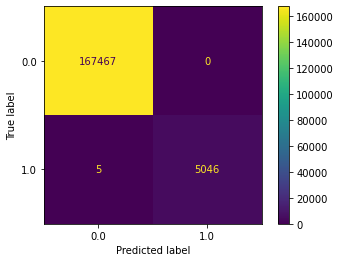

In [7]:
# Getting the confusion matrix:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(clf, X_test, Y_test)

#### Alternative Evaluation Metrices
* Precision/Specificity: how many selected instances are relevant.
* Recall/Sensitivity: how many relevant instances are selected.
* F1 score: harmonic mean of precision and recall.
* MCC: correlation coefficient between the observed and predicted binary classifications.

In [87]:
# Calculate recall, prediction and other metrics:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [104]:
print("Recall Score: ", recall_score(Y_test, y_pred, average="weighted")*100, '%')
print("Precision Score: ", precision_score(Y_test, y_pred, average="weighted")*100, '%')
print("F1 Score: ", f1_score(Y_test, y_pred, average="weighted")*100, '%')
print("MCC: ", matthews_corrcoef(Y_test, y_pred))

Recall Score:  99.9947831530623 %
Precision Score:  99.99478343341065 %
F1 Score:  99.99478089720147 %
MCC:  0.9990818441595625


The Matthews correlation coefficient (+1 represents a perfect prediction, 0 an average random prediction and -1 and inverse prediction).

Here as the MCC value is very close to 1 and hence represents perfect prediction.

In [88]:
from sklearn.metrics import precision_recall_fscore_support
x_1 = precision_recall_fscore_support(Y_test, y_pred, average='weighted') 
x_1

(0.9999478343341065, 0.9999478315306229, 0.9999478089720146, None)

# Model 2: Naive Bayes Classifier:


In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train.values.ravel())

GaussianNB()

#### Metric Calculations after fitting the model:

In [10]:
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9959830278579627


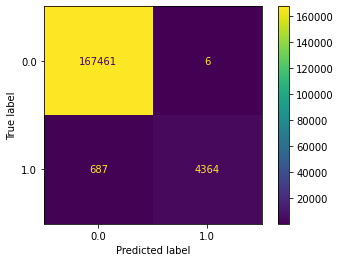

In [11]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)

In [110]:
# Calculate recall, prediction and other metrics:
print("Recall Score: ", recall_score(Y_test, y_pred, average="weighted")*100, '%')
print("Precision Score: ", precision_score(Y_test, y_pred, average="weighted")*100, '%')
print("F1 Score: ", f1_score(Y_test, y_pred, average="weighted")*100, '%')
print("MCC: ", matthews_corrcoef(Y_test, y_pred))

Recall Score:  99.59830278579626 %
Precision Score:  99.59937359638401 %
F1 Score:  99.58419192401956 %
MCC:  0.9269495471371301


Again the MCC score is pretty close to one suggesting good predictions

In [111]:
from sklearn.metrics import precision_recall_fscore_support
x_2 = precision_recall_fscore_support(Y_test, y_pred, average='weighted') 
x_2

(0.9959937359638401, 0.9959830278579627, 0.9958419192401956, None)

# Model 3: PCA

Here we need not use the response variable:

In [12]:
# Standerdize the required dataset:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train = scaler.transform(X_train)
test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [15]:
pca.fit(train)

PCA(n_components=0.95)

In [16]:
train_pca = pca.transform(train)
test_pca = pca.transform(test)

### Now apply the logistic regression model over the new points:

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logisticRegr = LogisticRegression(max_iter= 1000)

In [19]:
logisticRegr.fit(train_pca, Y_train.values.ravel())
#logisticRegr.predict(test_pca)
logisticRegr.score(test_pca, Y_test)

0.9975886574154581

#### Metric Calculations after fitting the model:

In [20]:
# Get the predicted values:
y_pred = logisticRegr.predict(test_pca)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9975886574154581


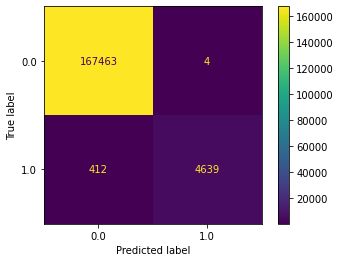

In [21]:
plot_confusion_matrix(logisticRegr, test_pca, Y_test.values.ravel())

In [114]:
# Calculate recall, prediction and other metrics:
print("Recall Score: ", recall_score(Y_test, y_pred, average="weighted")*100, '%')
print("Precision Score: ", precision_score(Y_test, y_pred, average="weighted")*100, '%')
print("F1 Score: ", f1_score(Y_test, y_pred, average="weighted")*100, '%')
print("MCC: ", matthews_corrcoef(Y_test, y_pred))

Recall Score:  99.7588657415458 %
Precision Score:  99.75924240924348 %
F1 Score:  99.75393801575464 %
MCC:  0.9567460087142277


Again the MCC value is close suggesting good predictions.

In [43]:
from sklearn.metrics import precision_recall_fscore_support
x_3 = precision_recall_fscore_support(Y_test, y_pred, average='weighted') 
x_3

(0.9975924240924349, 0.9975886574154581, 0.9975393801575464, None)

# Model 4: Multi layer Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train.values.ravel())
# Get the predicted values:
y_pred = clf.predict(X_test)
clf.score(X_test,Y_test)

0.9999304420408305

#### Metric Calculations after fitting the model:

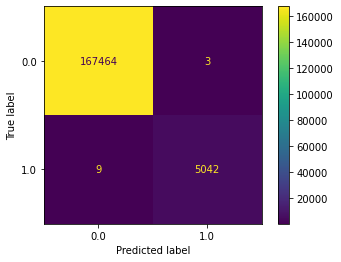

In [116]:
plot_confusion_matrix(clf, X_test, Y_test.values.ravel())

In [117]:
# Calculate recall, prediction and other metrics:
print("Recall Score: ", recall_score(Y_test, y_pred, average="weighted")*100, '%')
print("Precision Score: ", precision_score(Y_test, y_pred, average="weighted")*100, '%')
print("F1 Score: ", f1_score(Y_test, y_pred, average="weighted")*100, '%')
print("MCC: ", matthews_corrcoef(Y_test, y_pred))

Recall Score:  99.99304420408305 %
Precision Score:  99.99304232285965 %
F1 Score:  99.99304219948834 %
MCC:  0.9987757703304407


In [118]:
from sklearn.metrics import precision_recall_fscore_support
x_4 = precision_recall_fscore_support(Y_test, y_pred, average='weighted') 
x_4

(0.9999304232285965, 0.9999304420408305, 0.9999304219948835, None)

## COMPARISON BETWEEN DIFFERENT MODELS:

Recall is the most important value which we should measure. The recall is the measure of our model correctly identifying True Positives and here it is identifying the anomalies.

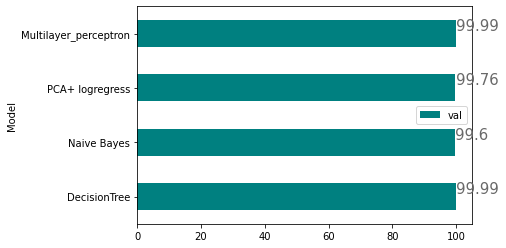

In [122]:
df = pd.DataFrame({'Model':['DecisionTree', 'Naive Bayes', 'PCA+ logregress', 'Multilayer_perceptron'], 
                   'val':[x_1[1]*100, x_2[1]*100, x_3[1]*100,x_4[1]*100] })
ax = df.plot.barh(x='Model', y='val', rot=0, color= 'teal')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')

The decision tree and Multilayer perceptron have the highest recall, and naive bayes is the least.But the values are pretty close to one another. 

However, more work can be done to handle with the imbalanced datasets and get better values as from all the confusion matrix diagrams it is evident that though all these models have good recall, the matrix still suggests that the models are mostly predicting the most popular class here. 

The problem of imbalanced dataset can be handled by also resampling the data to remove the bias and then perform futher analysis. Hence this project can be further extended to accomdate these changes.